In [41]:
import sys
from pathlib import Path

sys.path.insert(0, "..")

import analysis.model_card_graphics as mcg
from matplotlib import pyplot

def save(t, filename, mark_heads=False):
    p = mcg.DensityBokehPlotter("div", ".")
    p.full_color=(0, 0, 255)
    p.empty_color=(255, 190, 190)
    p.ratio = 1

    t= p.colorize_matrix(t)
    if mark_heads:
        heads = 12
        for i in range(1, heads):
            for j in range(-1, 1):
                index = i * (t.shape[0] // heads) + j
                if index >= 0 and index < t.shape[0]:
                    t[index] = 0
     
    base_size = 7.2
    pyplot.figure(figsize=(base_size * t.shape[1] / t.shape[0], base_size))
    pyplot.imshow(t / 256)
    pyplot.axis('off')
    pyplot.tight_layout(pad=0.00)
    full_filename = Path("../../../article_nn_pruning/images") / (filename + ".pdf")
    pyplot.savefig(full_filename,  bbox_inches=None, pad_inches=0.0)        
    
    #p.create_image(t, (path_name).open("wb"))

In [42]:
import torch

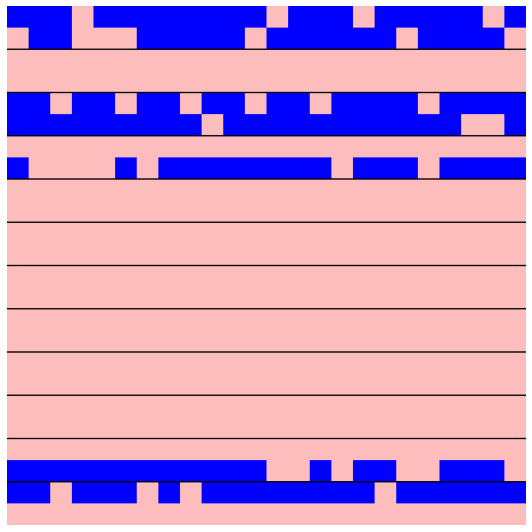

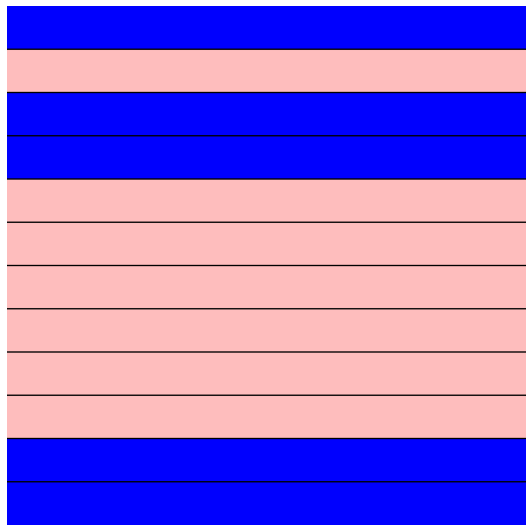

In [43]:
#t = torch.tensor([1,0,1,1,0,0, 0,0,0,0,1,1]).unsqueeze(-1)
#t = t.repeat_interleave(2 * 32, 0).repeat_interleave(24 * 32, 1)
#save(t, "attention_filled.png")

t = torch.tensor([1,0,1,1,0,0, 0,0,0,0,1,1]).unsqueeze(-1)
t = t.repeat_interleave(2, 0).repeat_interleave(24, 1)
t = t * ((torch.rand(24) < 0.75).unsqueeze(-1).repeat(1, 24))
t = t * (torch.rand(24, 24) < 0.75)
t = t.repeat_interleave(32, 0).repeat_interleave(32, 1)

save(t, "attention_block", mark_heads = True)

t = (t[::32] !=0).any(1).reshape(-1, 2).any(1).unsqueeze(-1).repeat_interleave(64, dim=0).repeat_interleave(768, dim=1).float()

save(t, "attention_filled", mark_heads = True)



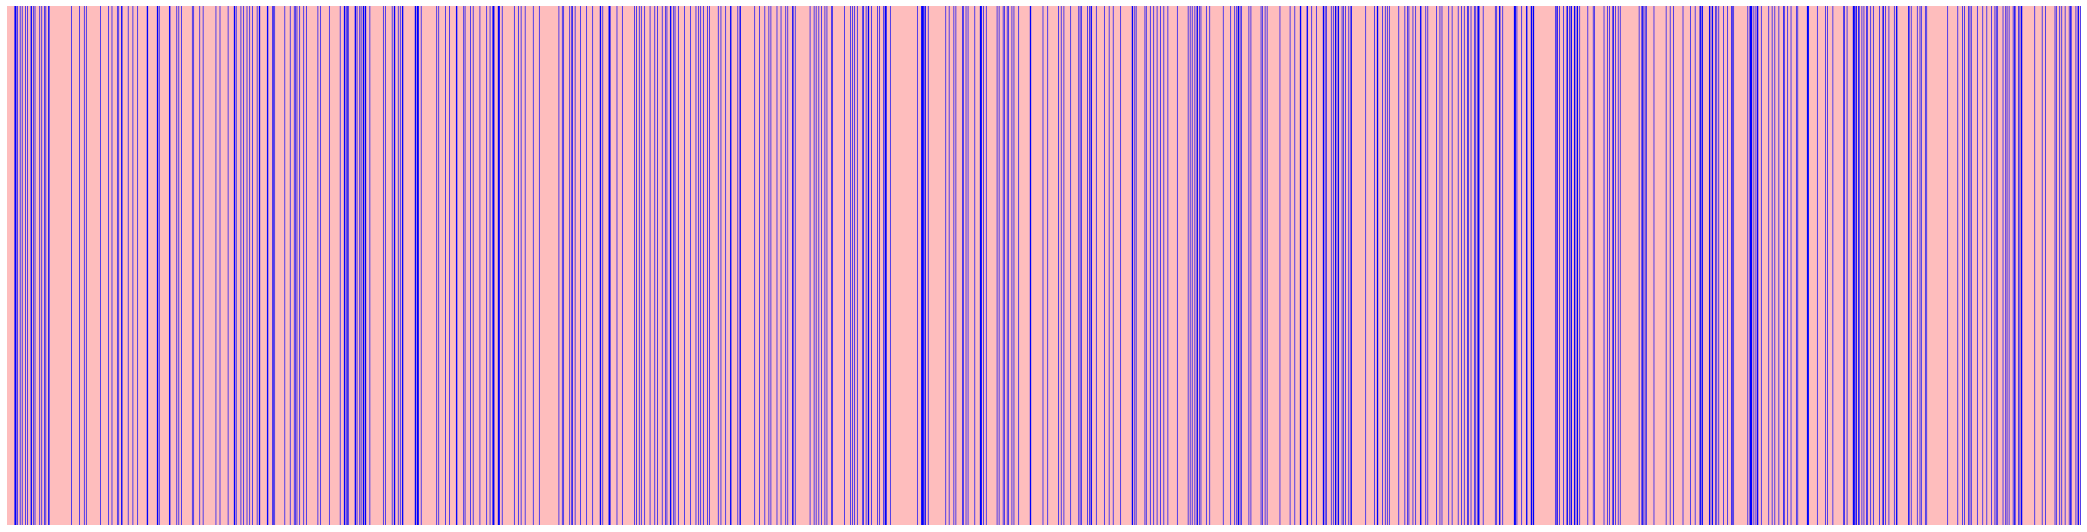

In [44]:
t = (torch.rand(768 * 4) < 0.18).unsqueeze(-1)

t = t.repeat_interleave(1, 0).repeat_interleave(768, 1).t()

save(t, "ff_col")

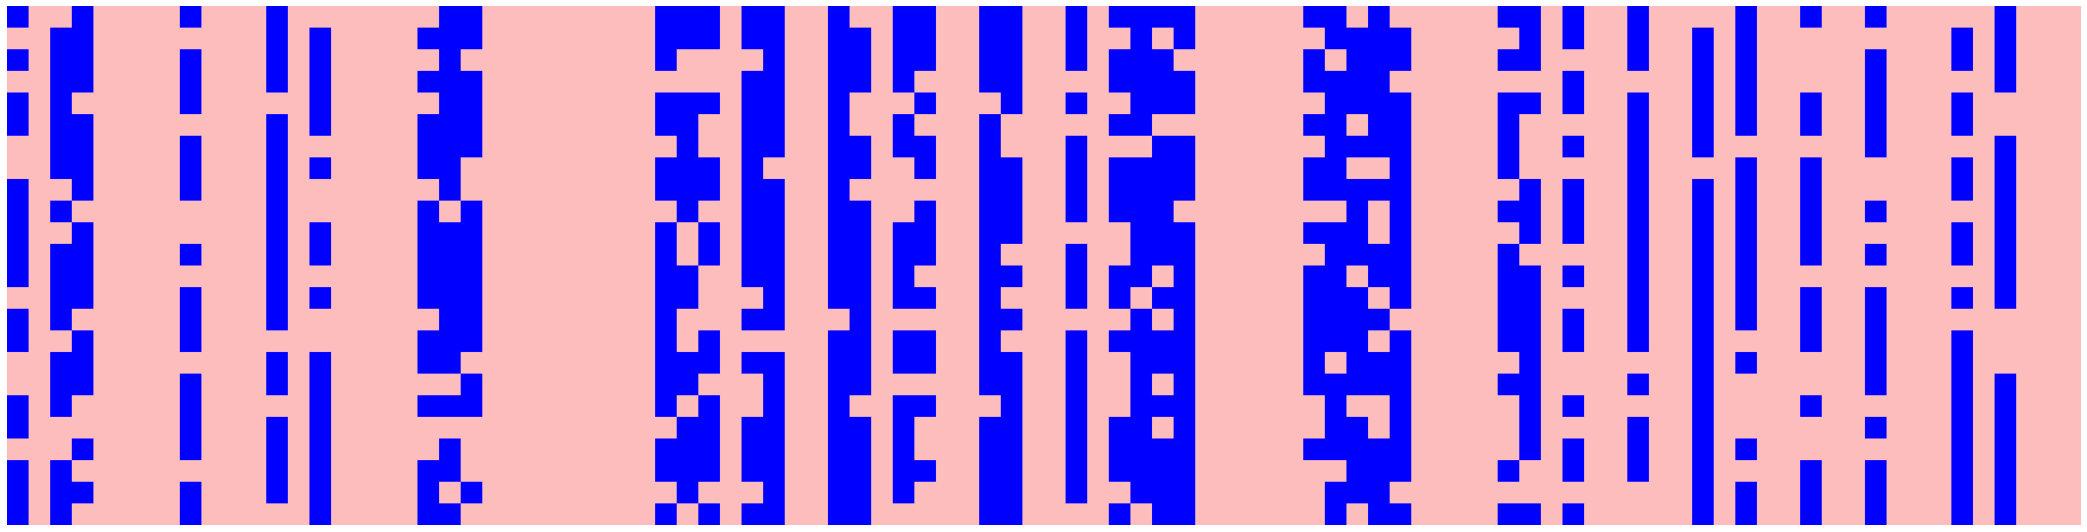

In [45]:
t = (torch.rand((768 * 4) // 32) < 0.35).unsqueeze(-1).repeat(1, 24)
t = t * (torch.rand(t.shape) < 0.75)
t = t.repeat_interleave(32, 0).repeat_interleave(32, 1).t()

save(t, "ff_block")
